In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()

# Normalizing the RGB codes by dividing it to the max RGB value.
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 29s 484us/sample - loss: 0.2202 - acc: 0.9347
Epoch 2/5
60000/60000 [==============================] - 42s 699us/sample - loss: 0.0978 - acc: 0.9708
Epoch 3/5
60000/60000 [==============================] - 39s 656us/sample - loss: 0.0706 - acc: 0.9781 - loss: 0.0707 - acc: 0.9
Epoch 4/5
60000/60000 [==============================] - 25s 422us/sample - loss: 0.0537 - acc: 0.9825
Epoch 5/5
60000/60000 [==============================] - 20s 329us/sample - loss: 0.0453 - acc: 0.9850


In [6]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 68us/sample - loss: 0.0643 - acc: 0.9793


[0.0643456607834436, 0.9793]

# different sized hidden layers

In [7]:
for n in [5, 10, 128, 512]:
    print(f'\n\n{n} HIDDEN NODES:\n\n')
    tempmodel = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
      tf.keras.layers.Dense(n, activation=tf.nn.relu),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ])
    tempmodel.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    
    tempmodel.fit(x_train, y_train, epochs=5)
    
    print(f'\n\n{n} HIDDEN NODES EVALUATION: \n')
    tempmodel.evaluate(x_test, y_test)



5 HIDDEN NODES:


Epoch 1/5
60000/60000 [==============================] - 3s 50us/sample - loss: 1.2878 - acc: 0.5516
Epoch 2/5
60000/60000 [==============================] - 3s 57us/sample - loss: 1.0274 - acc: 0.6477
Epoch 3/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.9764 - acc: 0.6539
Epoch 4/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.9537 - acc: 0.6614
Epoch 5/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.9330 - acc: 0.6749


5 HIDDEN NODES EVALUATION: 

10000/10000 [==============================] - 0s 28us/sample - loss: 0.5419 - acc: 0.8631


10 HIDDEN NODES:


Epoch 1/5
60000/60000 [==============================] - 3s 49us/sample - loss: 0.8723 - acc: 0.7184
Epoch 2/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.6272 - acc: 0.7997
Epoch 3/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.5866 - acc: 0.8128
Epoch 4/5
60000/60000 [======

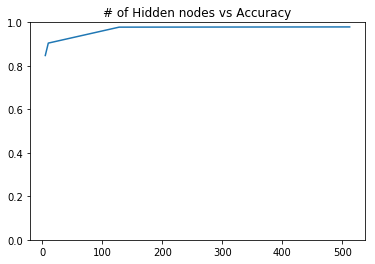

In [8]:
x = [5, 10, 128, 512]
y = [0.8476, 0.9046, 0.9780, 0.9790]

plt.plot(x, y)
plt.ylim(0, 1)
_ = plt.title("# of Hidden nodes vs Accuracy")

# new representation

In [9]:
# removing hidden nodes
no_hidden_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
no_hidden_model.compile(optimizer='adam',
          loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])
no_hidden_model.fit(x_train, y_train, epochs=5)
no_hidden_model.evaluate(x_test, y_test)

Epoch 1/5
60000/60000 [==============================] - 3s 55us/sample - loss: 0.5157 - acc: 0.8588
Epoch 2/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3433 - acc: 0.9021
Epoch 3/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.3253 - acc: 0.9071
Epoch 4/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3150 - acc: 0.9107
Epoch 5/5
10000/10000 [==============================] - 0s 33us/sample - loss: 0.2744 - acc: 0.9242


[0.27441600348353384, 0.9242]

In [10]:
weights = no_hidden_model.get_weights()

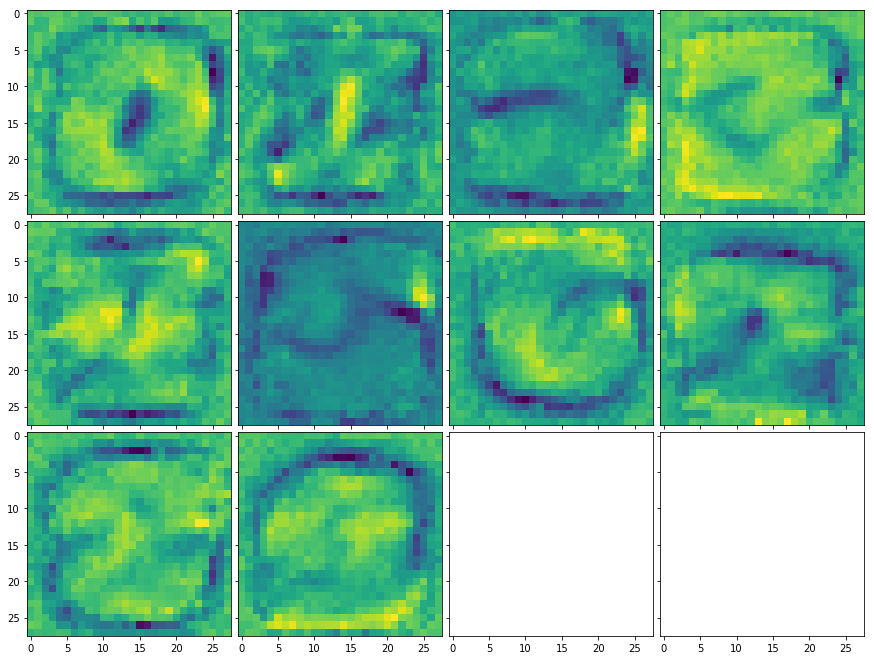

In [11]:
fig = plt.figure(1, (15., 15.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(3,4),  # creates 3x4 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )

for i in range(10):
    grid[i].imshow(weights[0][:,i].reshape((28,28)))